## ASANIYI TAIWO OLUSOLA (Task 2)





In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Import Required libraries
import pandas as pd
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix 

In [7]:
df= pd.read_csv("Loan Prediction/test_Y3wMUE5_7gLdaTN.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [13]:
# Handle missing data
df.fillna({'Gender': df['Gender'].mode()[0],
           'Married': df['Married'].mode()[0],
           'Dependants': df['Dependents'].mode()[0],
           'Self_employed':df['Self_Employed'].mode()[0],
           'loanAmount': df['LoanAmount'].median(),
           'Loan_Amount_Term': df['Loan_Amount_Term'].mode()[0],
           'Credit_History': df['Credit_History'].mode()[0]},
           inplace=True)

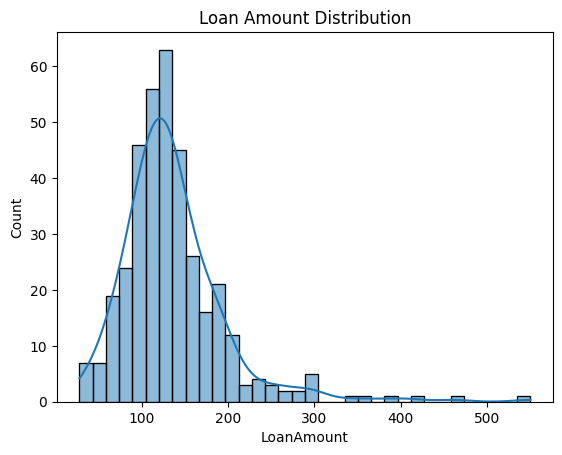

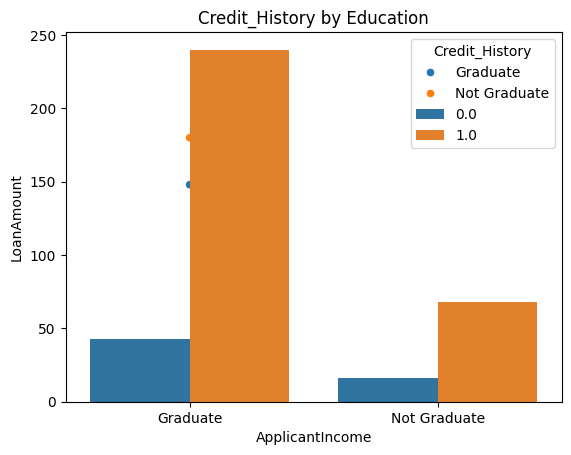

In [20]:
# Visuaize key features 
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')
plt.show()

sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Education', data=df)
plt.title('Income vs Loan Amount by Education')
plt.show

sns.countplot(x='Education', hue='Credit_History', data=df)
plt.title('Credit_History by Education')
plt.show()




In [21]:
#Encode categorical variables 
df_encoded =pd.get_dummies(df, drop_first=True)

In [24]:
#Split Data for Training and Testing    
X= df_encoded.drop('Credit_History', axis=1)
y= df_encoded['Credit_History']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [25]:
#Train Logistic Regression and Decision Tree 
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_predictions = log_model.predict(X_test)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

c:\Users\FITILA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
#Evaluate Model Accuracy
log_accuracy = accuracy_score(y_test, log_predictions)
log_cm = confusion_matrix(y_test, log_predictions)

tree_accuracy = accuracy_score(y_test, tree_predictions)
tree_cm = confusion_matrix(y_test, tree_predictions)

print("Logistic Regression Accuracy:", log_accuracy)
print("Logistic Confusion Matrix:\n", log_cm)

print("Decision Tree Accuracy:", tree_accuracy)
print("Decision Tree Confusion Matrix:\n", tree_cm)

Logistic Regression Accuracy: 0.7432432432432432
Logistic Confusion Matrix:
 [[ 0 19]
 [ 0 55]]
Decision Tree Accuracy: 0.7027027027027027
Decision Tree Confusion Matrix:
 [[ 2 17]
 [ 5 50]]
